In [1]:
import pandas as pd

In [2]:
numeros = [1,2,3,4,5,6,7,8]
serie = pd.Series(numeros)
serie, type(serie)

(0    1
 1    2
 2    3
 3    4
 4    5
 5    6
 6    7
 7    8
 dtype: int64,
 pandas.core.series.Series)

In [3]:
data = {
    "Nombre":["Ana","Pedro", "María", "Luis"],
    "Edad": [22, 25, 28, 23],
    "Ciudad": ["Barcelona", "Madrid","Valencia", "Servia"]
}
data, type(data)

({'Nombre': ['Ana', 'Pedro', 'María', 'Luis'],
  'Edad': [22, 25, 28, 23],
  'Ciudad': ['Barcelona', 'Madrid', 'Valencia', 'Servia']},
 dict)

In [5]:
#genera un dataframe a partrir de un diccionario

df = pd.DataFrame(data=data)
df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Pedro,25,Madrid
2,María,28,Valencia
3,Luis,23,Servia


In [6]:
# Exportar DataFrame
df.to_csv("data.csv")

In [9]:
#importar DataFrame
import_dr = pd.read_csv("data.csv", index_col=0)
import_dr

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Pedro,25,Madrid
2,María,28,Valencia
3,Luis,23,Servia


In [11]:
#Seleccionar una culumna
nombres = df["Nombre"]
print(nombres, type(nombres))

0      Ana
1    Pedro
2    María
3     Luis
Name: Nombre, dtype: object <class 'pandas.core.series.Series'>


In [13]:
# Seleccionar una o mas columnas
df[["Nombre", "Edad"]]

,Nombre,Edad
0,Ana,22
1,Pedro,25
2,María,28
3,Luis,23


In [14]:
#filtrara por indice
fila = df.loc[2]
fila

Nombre       María
Edad            28
Ciudad    Valencia
Name: 2, dtype: object

In [15]:
#filtrar por condiciones
df[df["Edad" ]  > 23]

,Nombre,Edad,Ciudad
1,Pedro,25,Madrid
2,María,28,Valencia


In [20]:
filtro = (df["Edad"] > 23) & (df["Nombre"].str.startswith("P"))
df[filtro]


,Nombre,Edad,Ciudad
1,Pedro,25,Madrid


In [21]:
#filtrar por query
df.query("Edad >23")

,Nombre,Edad,Ciudad
1,Pedro,25,Madrid
2,María,28,Valencia


In [22]:
df [df["Nombre"].isin(["Ana", "Carlos", "Luis"]) ]

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
3,Luis,23,Servia


In [23]:
def longitud_5(Nombre):
    return len(Nombre) == 5

df[df["Nombre"].apply(longitud_5)]
    

,Nombre,Edad,Ciudad
1,Pedro,25,Madrid
2,María,28,Valencia


In [24]:
# Filtar por eddes entre 25 y 35 años (inclusive)
df[df["Edad"].between(25,35)]

,Nombre,Edad,Ciudad
1,Pedro,25,Madrid
2,María,28,Valencia


In [33]:
data2 = {
    "Nombre": ["Juan", "Ana", "Luis", "Laura", "Pedro", "Carla"],
    "Ciudad": ["Madrid", "Barcelona", "Valencia", "Sevilla", "Bilbao", "Malaga"],
    "Edad": [22, 25, 30, 19, 23, 28],
    "Puntuación": [85, 90, 88, 92, 79, 95]
}

df = pd.DataFrame(data2)
df

,Nombre,Ciudad,Edad,Puntuación
0,Juan,Madrid,22,85
1,Ana,Barcelona,25,90
2,Luis,Valencia,30,88
3,Laura,Sevilla,19,92
4,Pedro,Bilbao,23,79
5,Carla,Malaga,28,95


In [34]:
# Agrupar los datos por ciudad
gruped = df.groupby("Ciudad")
print(gruped.groups)

{'Barcelona': [1], 'Bilbao': [4], 'Madrid': [0], 'Malaga': [5], 'Sevilla': [3], 'Valencia': [2]}


In [40]:
import pandas as pd

# Crear el DataFrame con los nuevos datos
data2 = {
    "Nombre": ["Juan", "Ana", "Luis", "Laura", "Pedro", "Carla"],
    "Ciudad": ["Madrid", "Barcelona", "Valencia", "Sevilla", "Bilbao", "Malaga"],
    "Edad": [22, 25, 30, 19, 23, 28],
    "Puntuación": [85, 90, 88, 92, 79, 95]
}

df = pd.DataFrame(data2)

# Agrupar por 'Ciudad'
grouped = df.groupby("Ciudad")

# Imprimir los grupos para verificar la agrupación
print("Grupos agrupados por 'Ciudad':")
print(grouped.groups)

# Agregar datos: calcular la media de 'Edad' y la suma de 'Puntuación'
try:
    aggregated_data = grouped.agg({
        "Edad": "mean",
        "Puntuación": "sum"
    })
    print("\nDatos agregados:")
    print(aggregated_data)
except Exception as e:
    print(f"Error durante la agregación: {e}")


Grupos agrupados por 'Ciudad':
{'Barcelona': [1], 'Bilbao': [4], 'Madrid': [0], 'Malaga': [5], 'Sevilla': [3], 'Valencia': [2]}

Datos agregados:
           Edad  Puntuación
Ciudad                     
Barcelona  25.0          90
Bilbao     23.0          79
Madrid     22.0          85
Malaga     28.0          95
Sevilla    19.0          92
Valencia   30.0          88


In [42]:
# Crear el DataFrame
df = pd.DataFrame(data2)

# Agrupar por 'Ciudad'
grouped = df.groupby("Ciudad")

# Definir la función personalizada para calcular el rango
def rango(series):
    return series.max() - series.min()

# Aplicar la función personalizada usando agg
try:
    aggregated_data_custom = grouped.agg({
        "Edad": rango,
        "Puntuación": rango
    })
    print("Datos agregados con la función personalizada:")
    print(aggregated_data_custom)
except Exception as e:
    print(f"Error durante la agregación: {e}")

Datos agregados con la función personalizada:
           Edad  Puntuación
Ciudad                     
Barcelona     0           0
Bilbao        0           0
Madrid        0           0
Malaga        0           0
Sevilla       0           0
Valencia      0           0


In [47]:
data2["Categoria"] = ["A", "B", "C", "D", "E", "F"]
df = pd.DataFrame(data2)
df

,Nombre,Ciudad,Edad,Puntuación,Categoria
0,Juan,Madrid,22,85,A
1,Ana,Barcelona,25,90,B
2,Luis,Valencia,30,88,C
3,Laura,Sevilla,19,92,D
4,Pedro,Bilbao,23,79,E
5,Carla,Malaga,28,95,F


In [48]:
#Agrupar datos por ciudad y categoria
gruped_multi = df.groupby(["Categoria", "Ciudad"])
gruped_multi.groups

{('A', 'Madrid'): [0], ('B', 'Barcelona'): [1], ('C', 'Valencia'): [2], ('D', 'Sevilla'): [3], ('E', 'Bilbao'): [4], ('F', 'Malaga'): [5]}

In [58]:
# Agregar una columna
# Crear un DataFrame de ejemplo
# Definir los datos iniciales
data3 = {
    'Nombre': ["Juan", "Ana", "Luis", "Laura"],
    'Edad': [25, 66, 33, 28],
    'Ciudad': ['Madrid', 'Bilbao', 'Valencia', 'Sevilla']
}

# Crear el DataFrame inicial
df3 = pd.DataFrame(data3)
df3

data4 = {
    'Nombre': ['Carla', 'Irene'],
    'Edad': [38, 27],
    'Ciudad': ['Madrid', 'Bilbao']
}

# Crear el DataFrame adicional
df4 = pd.DataFrame(data4)

df4

,Nombre,Edad,Ciudad
0,Carla,38,Madrid
1,Irene,27,Bilbao


In [50]:
# ära agregar una columna

df["Ciudad"] = ["Madrid" , "Varcelona", "Madrid", "Valencia"]
df

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,66,Varcelona
2,Luis,33,Madrid
3,Laura,28,Valencia


In [54]:
#Generamos una nueva fila
new_row = pd.Series({"Nombre" :"Pedro", "Edad":48, "Ciudad":"Barcelona"})

# Agregamos una nueva fila

df = pd.concat([df,  new_row.to_frame().T], ignore_index=True)
df

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,66,Varcelona
2,Luis,33,Madrid
3,Laura,28,Valencia
4,Pedro,45,Barcelona
5,Pedro,45,Barcelona
6,Pedro,48,Barcelona
7,Pedro,48,Barcelona


In [59]:
df3

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,66,Bilbao
2,Luis,33,Valencia
3,Laura,28,Sevilla


In [60]:
df4

,Nombre,Edad,Ciudad
0,Carla,38,Madrid
1,Irene,27,Bilbao


In [61]:
# Concatenar ambos DataFrames
df_combined = pd.concat([df3, df4], ignore_index=True)
df_combined

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,66,Bilbao
2,Luis,33,Valencia
3,Laura,28,Sevilla
4,Carla,38,Madrid
5,Irene,27,Bilbao


In [ ]:
import numpy as np

In [64]:
# Crear arreglo de 1 dimension con 5 elementos
arr1 = np.array([1, 2, 3,5,6])

print ("Arreglo 1d:", arr1)


Arreglo 1d: [1 2 3 5 6]


In [67]:
# Crear un array de 6 elementos
arr1 = np.array([1, 2, 3, 4, 5, 6])

# Cambiar la forma del array a una matriz de 2x3
arr2 = arr1.reshape((2, 3))

print("Arreglo 2 dimensiones: \n", arr2)

Arreglo 2 dimensiones: 
 [[1 2 3]
 [4 5 6]]


In [68]:
# Crear una matriz con forma de (4*4) con números aleatorios

matrix = np.random.rand(4,4)
print("Arregla 4 * 4: \n",matrix)

Arregla 4 * 4: 
 [[0.6301811  0.96122383 0.78359412 0.44385836]
 [0.39451344 0.90956835 0.42453331 0.68402869]
 [0.61530128 0.49172012 0.18476324 0.27293531]
 [0.15892077 0.72583499 0.46300224 0.25512622]]


In [72]:
# Crear una lista de listas
lista_de_listas = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# Convertir la lista de listas en un array de 2 dimensiones
array_2d = np.array(lista_de_listas)

print("Arreglo 2 dimensiones:")
print(array_2d)

Arreglo 2 dimensiones:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


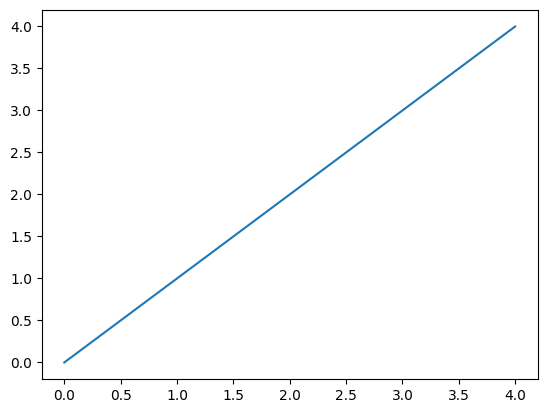

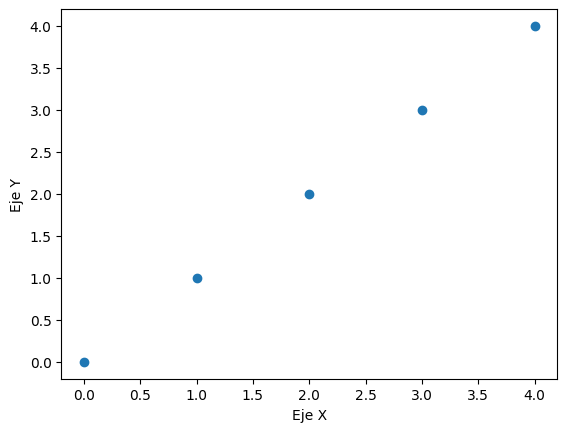

In [78]:
import matplotlib.pyplot as plt

# Definir los datos
x = [0, 1, 2, 3, 4]
y = [0, 1, 2, 3, 4]

# Crear la gráfica
plt.plot(x, y)

# Mostrar la gráfica
plt.show()
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.scatter(x, y)

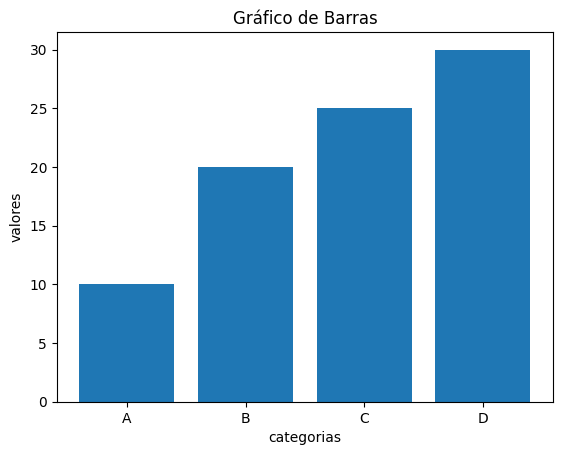

In [79]:
categorias = ["A", "B", "C", "D"]
valores =[10,20,25,30]
plt.bar(categorias, valores)
plt.title("Gráfico de Barras")
plt.xlabel("categorias")
plt.ylabel("valores")
plt.show()

In [80]:
import seaborn as sns 

In [81]:
#Grafica de dispersion

data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [82]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configurar el estilo de las gráficas
sns.set(style="darkgrid")

# Cargar el dataset "tips"
df = sns.load_dataset("tips")

# Mostrar el dataframe
print(df)


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


C:\Users\mario\AppData\Local\Temp\ipykernel_19192\1680838607.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="sex", y="tip", ci=None)


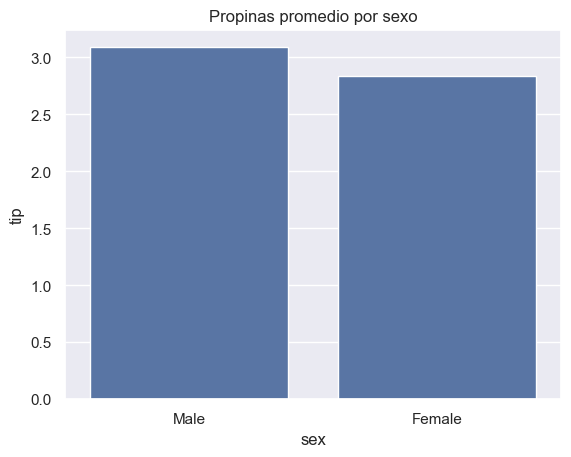

In [84]:
# Grafica de barras de propinas promedio por sexo
# Crear un gráfico de barras
sns.barplot(data=df, x="sex", y="tip", ci=None)

# Agregar título al gráfico
plt.title("Propinas promedio por sexo")

# Mostrar el gráfico
plt.show()

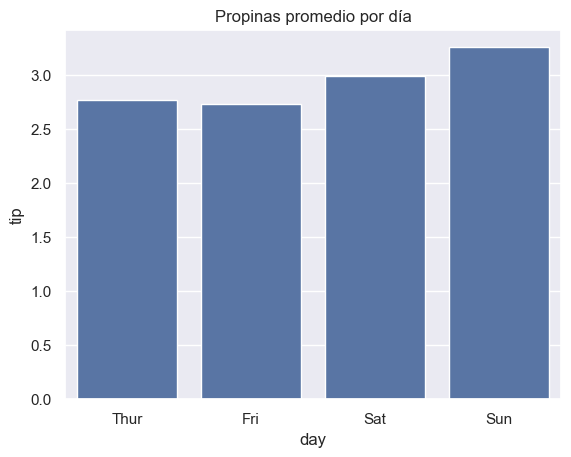

In [85]:
sns.barplot(data=df, x="day", y="tip", errorbar=None)
plt.title("Propinas promedio por día")
plt.show()

# Los domingos pagan mas propinas


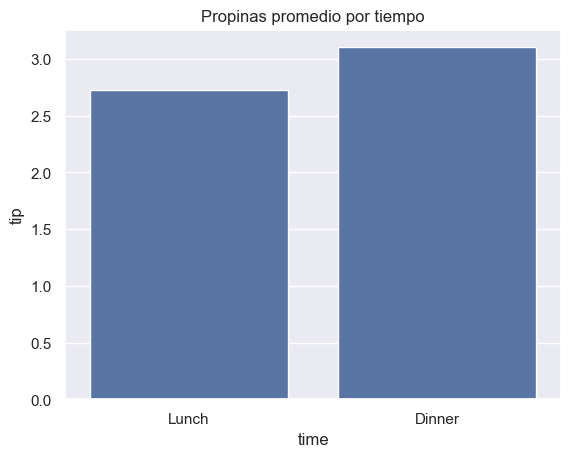

In [87]:
sns.barplot(data=df, x="time", y="tip", errorbar=None)
plt.title("Propinas promedio por tiempo")
plt.show()
# En la cena se paga mas propina en promedio

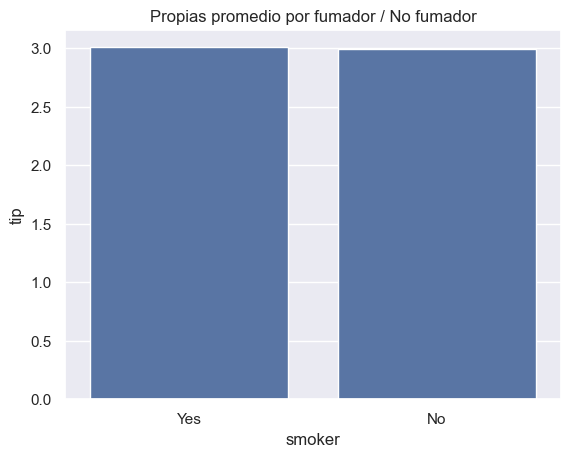

In [90]:
# Propinas promedio por fumador

sns.barplot(data = df, x="smoker", y ="tip", errorbar=None)
plt.title("Propias promedio por fumador / No fumador")
plt.show()

#El echo de que tu cliente fume o no,no afecta a la propina


C:\Users\mario\AppData\Local\Temp\ipykernel_19192\1347761025.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="day", y="tip", hue="sex", ci=None)


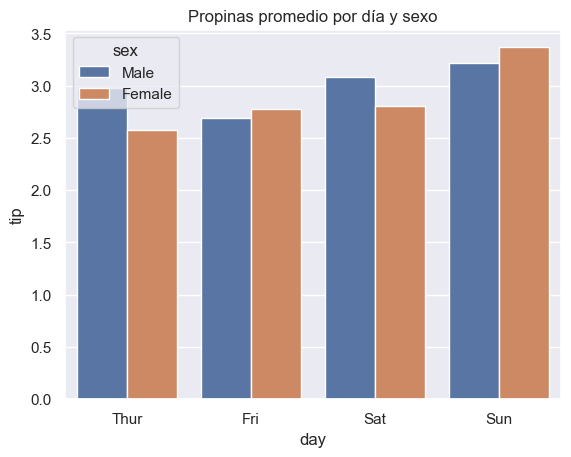

In [92]:
# Graafico de barras de propinas promedio (Día)

# Crear un gráfico de barras
sns.barplot(data=df, x="day", y="tip", hue="sex", ci=None)

# Agregar título al gráfico
plt.title("Propinas promedio por día y sexo")

# Mostrar el gráfico
plt.show()


C:\Users\mario\AppData\Local\Temp\ipykernel_19192\3709344645.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="time", y="tip", hue="sex", ci=None)


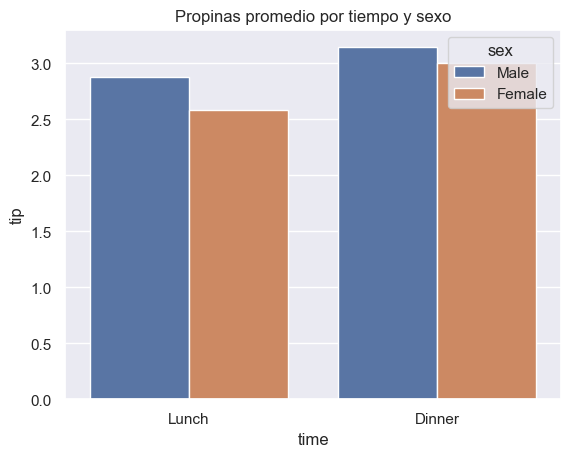

In [93]:
# Graafico de barras de propinas promedio (Tiempo)

# Crear un gráfico de barras
sns.barplot(data=df, x="time", y="tip", hue="sex", ci=None)

# Agregar título al gráfico
plt.title("Propinas promedio por tiempo y sexo")

# Mostrar el gráfico
plt.show()

C:\Users\mario\AppData\Local\Temp\ipykernel_19192\765194498.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="smoker", y="tip", hue="sex", ci=None)


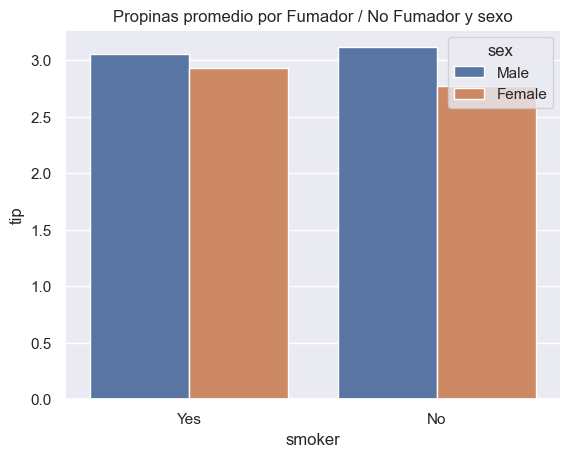

In [94]:

# Graafico de barras de propinas promedio (Fumador, sexo)

# Crear un gráfico de barras
sns.barplot(data=df, x="smoker", y="tip", hue="sex", ci=None)

# Agregar título al gráfico
plt.title("Propinas promedio por Fumador / No Fumador y sexo")

# Mostrar el gráfico
plt.show()

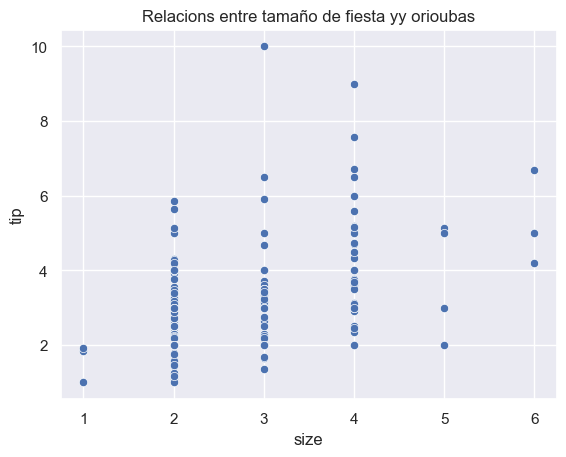

In [95]:
#Grafico de dispercion entre size y tipe
sns.scatterplot(data=df, x="size", y="tip")
plt.title("Relacions entre tamaño de fiesta yy orioubas")
plt.show()

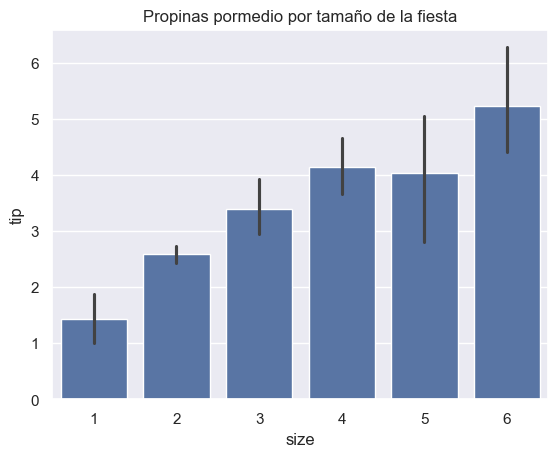

In [96]:
# Grafico de barras promedio por tamaño de fiesta

sns.barplot(data=df, x="size", y="tip")
plt.title("Propinas pormedio por tamaño de la fiesta")
plt.show()

In [99]:


# Calcular el porcentaje de propina y agregarlo al DataFrame
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

# Mostrar el DataFrame actualizado
print(df)

     total_bill   tip     sex smoker   day    time  size  tip_percentage
0         16.99  1.01  Female     No   Sun  Dinner     2        5.944673
1         10.34  1.66    Male     No   Sun  Dinner     3       16.054159
2         21.01  3.50    Male     No   Sun  Dinner     3       16.658734
3         23.68  3.31    Male     No   Sun  Dinner     2       13.978041
4         24.59  3.61  Female     No   Sun  Dinner     4       14.680765
..          ...   ...     ...    ...   ...     ...   ...             ...
239       29.03  5.92    Male     No   Sat  Dinner     3       20.392697
240       27.18  2.00  Female    Yes   Sat  Dinner     2        7.358352
241       22.67  2.00    Male    Yes   Sat  Dinner     2        8.822232
242       17.82  1.75    Male     No   Sat  Dinner     2        9.820426
243       18.78  3.00  Female     No  Thur  Dinner     2       15.974441

[244 rows x 8 columns]
